In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cartopy.io import srtm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from rasterio.plot import show
from Point import Point
import os

In [3]:
def get_map_info(tlf_file):
    src = rasterio.open(tlf_file)
    return src.bounds, src.read()[0][::-1]

In [14]:
def merge_horizontal_maps(left_map_bounds,left_map_heights,right_map_bounds,right_map_heights):
    new_heights = []
    for i in range(left_map_heights.shape[0]):
        new_row = []
        new_row.extend(left_map_heights[i])
        new_row.extend(right_map_heights[i])
        new_heights.append(new_row)
    new_bounds = [left_map_bounds[0],left_map_bounds[1],right_map_bounds[2],left_map_bounds[3]]
    return new_bounds,new_heights


In [23]:
def merge_verticaly_maps(top_map_bounds,top_map_heights,bottom_map_bounds,bottom_map_heights):
    new_heights = top_map_heights
    for i in range(len(top_map_heights)):
        new_heights.append(bottom_map_heights)
    new_bounds = [top_map_bounds[0],bottom_map_bounds[1],top_map_bounds[2],top_map_bounds[3]]
    return new_bounds,new_heights

In [19]:
def get_full_israel_map():
    m1b, m1h = get_map_info('./maps/n29_e034_1arc_v3.tif')
    m2b, m2h = get_map_info('./maps/n29_e035_1arc_v3.tif')

    m3b, m3h = get_map_info('./maps/n30_e034_1arc_v3.tif')
    m4b, m4h = get_map_info('./maps/n30_e035_1arc_v3.tif')

    m5b, m5h = get_map_info('./maps/n31_e034_1arc_v3.tif')
    m6b, m6h = get_map_info('./maps/n31_e035_1arc_v3.tif')

    m7b, m7h = get_map_info('./maps/n32_e035_1arc_v3.tif')
    m8b, m8h = get_map_info('./maps/n33_e035_1arc_v3.tif')

    couple1b, couple1h = merge_horizontal_maps(m1b,m1h,m2b,m2h)
    couple2b, couple2h = merge_horizontal_maps(m3b,m3h,m4b,m4h)
    couple3b, couple3h = merge_horizontal_maps(m5b,m5h,m6b,m6h)
    couple4b, couple4h = merge_horizontal_maps(m7b,m7h,m8b,m8h)

    full_map_bounds,full_map_heights = merge_verticaly_maps(couple4b,couple4h,couple3b,couple3h)
    full_map_bounds,full_map_heights = merge_verticaly_maps(full_map_bounds,full_map_heights,couple2b,couple2h)
    full_map_bounds,full_map_heights = merge_verticaly_maps(full_map_bounds,full_map_heights,couple1b,couple1h)

    return full_map_bounds, full_map_heights

In [4]:
def get_map(map_bounds,map_heights,points = []):
    # Tel Aviv coordinates
    lat = map_bounds[1]
    lon = map_bounds[0]

    map_width = (map_bounds[2]-map_bounds[0])
    map_height = (map_bounds[3]-map_bounds[1])
    
    elevation_data = np.array(map_heights)

    # Create a figure and axis with Cartopy projection
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add coastlines and other features
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')

    # Plot the height data using pcolormesh
    c = ax.pcolormesh(lon + np.linspace(0, map_width, elevation_data.shape[1]),
                    lat + np.linspace(0, map_height, elevation_data.shape[0]),
                    elevation_data, cmap='viridis', transform=ccrs.PlateCarree())

    # Add colorbar
    cbar = plt.colorbar(c, ax=ax, orientation='vertical', label='Height (meters)')

    # Add gridlines and labels for x and y axes
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER


    for point in points:
        ax.scatter(point.y, point.x, color=point.color, marker='o', s=50, transform=ccrs.PlateCarree(), label='Marker')
        
    # Set title and show the plot
    plt.title('Tel Aviv - Height Map')
    return plt

In [24]:
# directory_path = './maps/'
# file_names = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

# Print the list of file names
full_map_bounds, full_map_heights = get_full_israel_map()
map= get_map(full_map_bounds,full_map_heights)

AttributeError: 'list' object has no attribute 'len'

g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


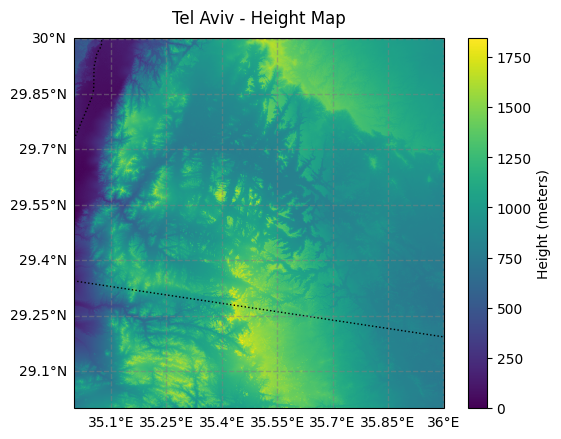

In [16]:
rights_map_bounds, rights_map_heights = get_map_info('./maps/n29_e035_1arc_v3.tif')
map= get_map(rights_map_bounds,rights_map_heights)

g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
g:\האחסון שלי\לימודים\שנה ג\אלגוריצמים בסיסים של למידת מכונה ברפואה דיגיטלית\פרויקט סעום\Python_code\venv\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


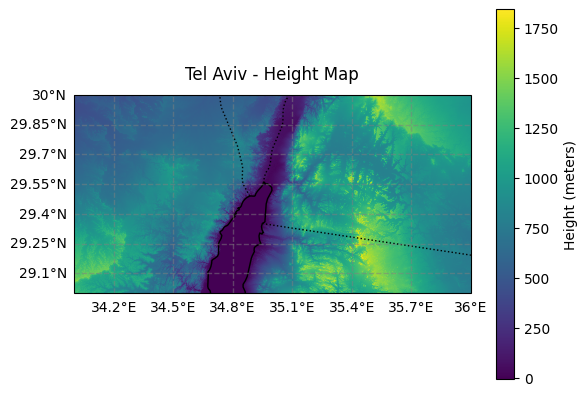

In [17]:
new_map_bounds, new_map_heights = merge_horizontal_maps(left_map_bounds,left_map_heights,rights_map_bounds,rights_map_heights)
map= get_map(new_map_bounds,new_map_heights)